# Titanic
<img src="https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/MA_00079563_yvu84f.jpg" style="width: 650px;"/>

# Introduction

In this notebook, I will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival.
In this challenge, we are asked to predict whether a passenger on the titanic would have been survived or not.

# Import libraries

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt

%matplotlib inline

# Getting the data

In [48]:
data = pd.read_csv('../input/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

# Data Exploration/Analysis

In [49]:
print(data.shape)

(891, 12)


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects. 
* Through this data we would like to find the effect of various factors such as age, sex, station of Embarkment,their class and no. of relatives present on survival chances of passangers.our cabin column has lots of null values.so we would not like to modify it much. there is only 2 entries in embarked column having null values,so we will replace it with mode value of point of embarktion

In [51]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

 total number of survived passanger 

In [52]:
data.Survived.sum()

342

# Visulaly analyzing

<Figure size 432x288 with 0 Axes>

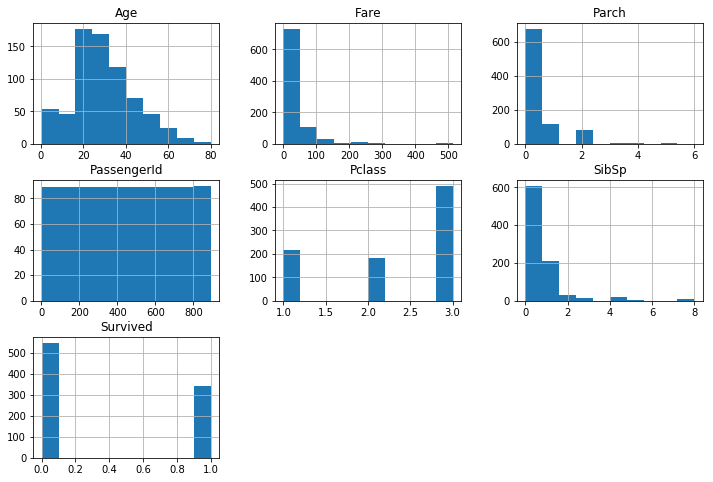

<Figure size 432x288 with 0 Axes>

In [53]:
data.hist(figsize=(12,8))
plt.figure()

### Survived

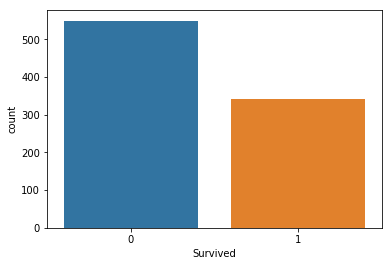

In [54]:
sns.countplot(x='Survived',data=data)

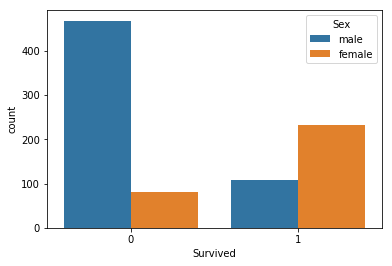

In [55]:
sns.countplot(x='Survived',hue='Sex',data=data)

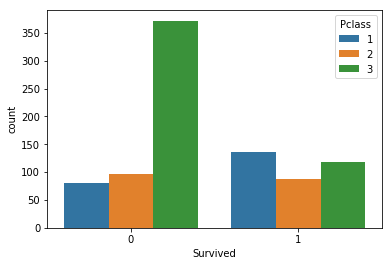

In [56]:
sns.countplot(x='Survived',hue='Pclass',data=data)

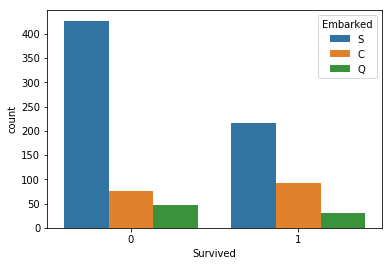

In [57]:
sns.countplot(x='Survived',hue='Embarked',data=data)

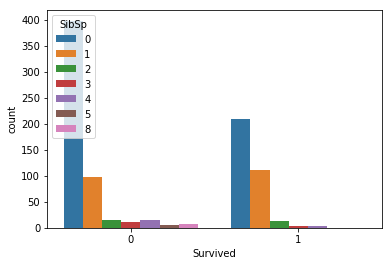

In [58]:
sns.countplot(x='Survived',hue='SibSp',data=data)

### SibSp

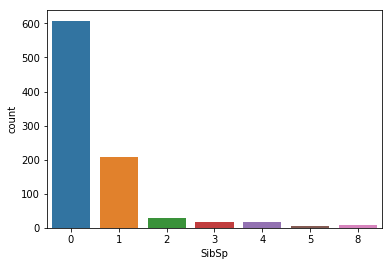

In [59]:
sns.countplot(x='SibSp',data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


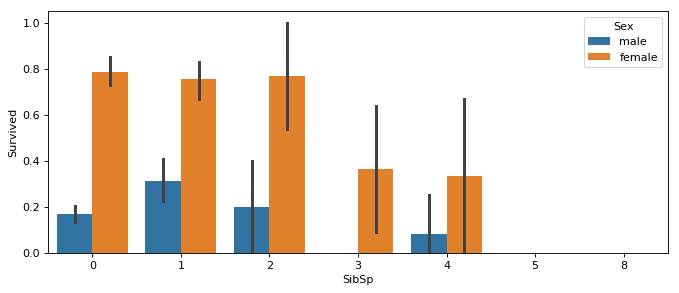

In [60]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='SibSp', y='Survived', hue="Sex", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


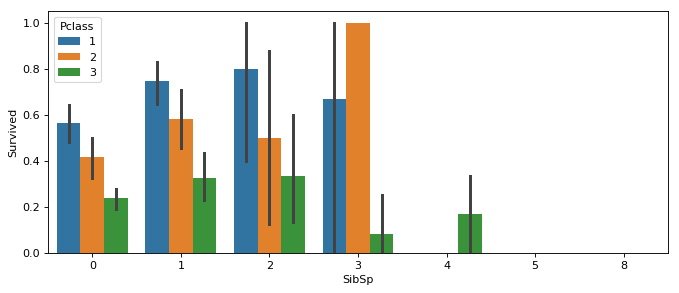

In [61]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='SibSp', y='Survived', hue="Pclass", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


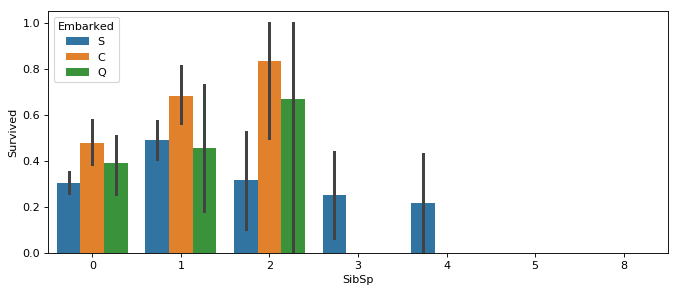

In [62]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='SibSp', y='Survived', hue="Embarked", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


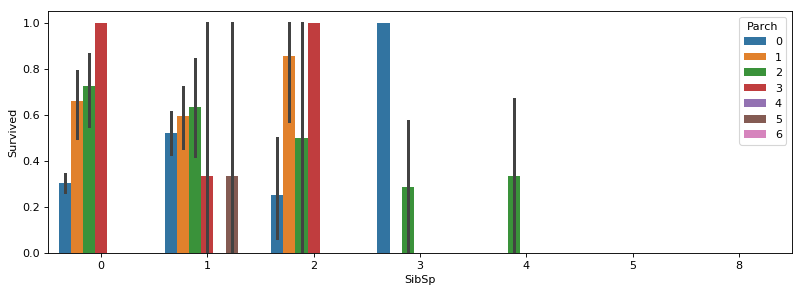

In [63]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='SibSp', y='Survived', hue="Parch", data=data)
plt.show()

###### >> SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

### Embarked

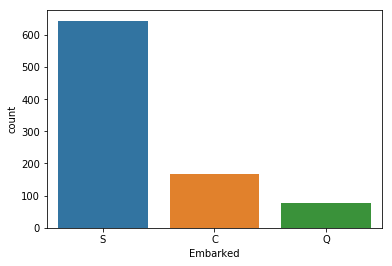

In [64]:
sns.countplot(x='Embarked',data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


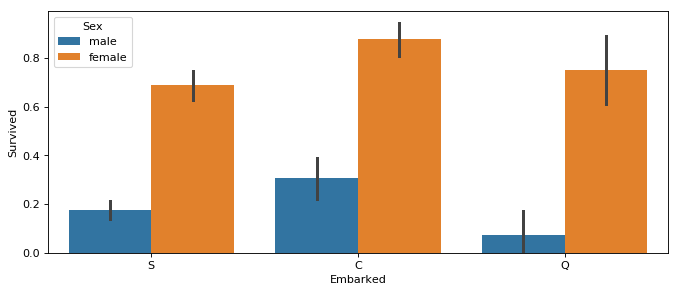

In [65]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='Embarked', y='Survived', hue="Sex", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


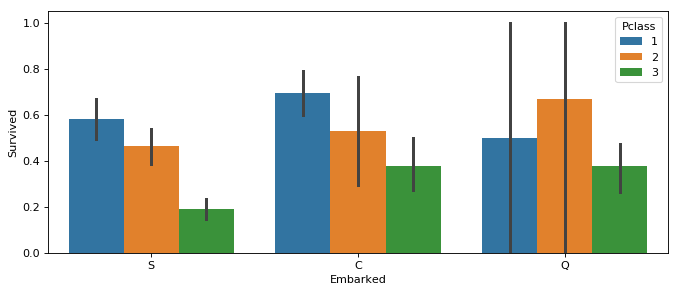

In [66]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='Embarked', y='Survived', hue="Pclass", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


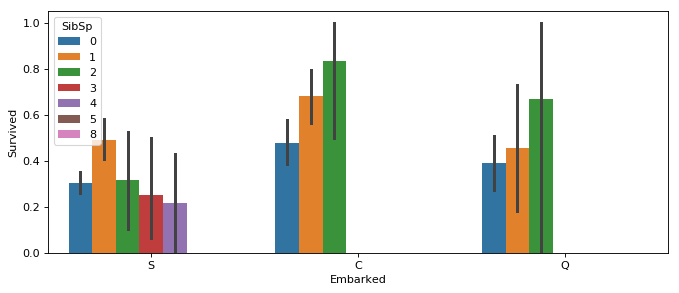

In [67]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='Embarked', y='Survived', hue="SibSp", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


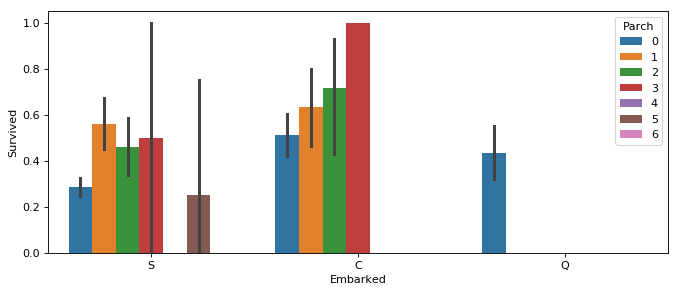

In [68]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='Embarked', y='Survived', hue="Parch", data=data)
plt.show()

### Pclass

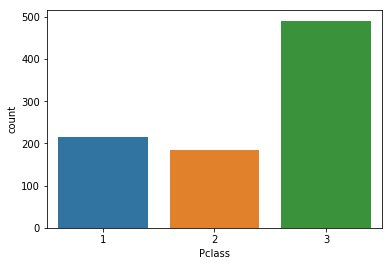

In [69]:
sns.countplot(x='Pclass',data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


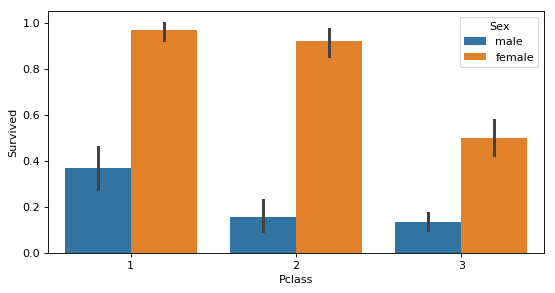

In [70]:
plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='Pclass', y='Survived', hue="Sex", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


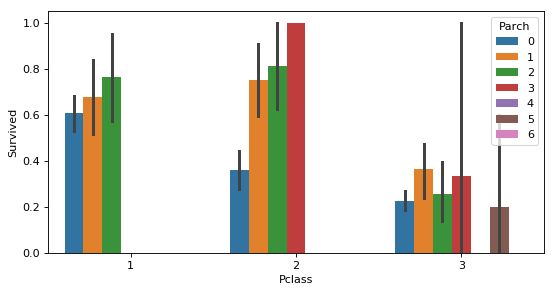

In [71]:
plt.figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(x='Pclass', y='Survived', hue="Parch", data=data)
plt.show()

### Fare

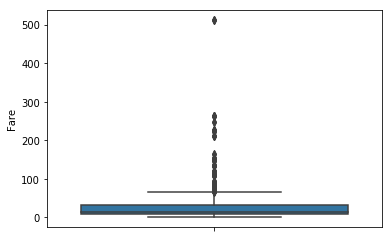

In [72]:
sns.boxplot(y='Fare',data=data)

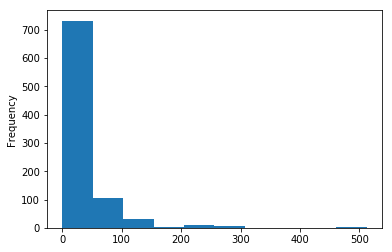

In [73]:
data['Fare'].plot.hist()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


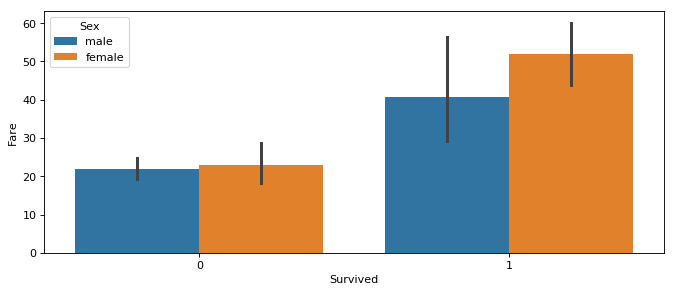

In [74]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(y='Fare', x='Survived', hue="Sex", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


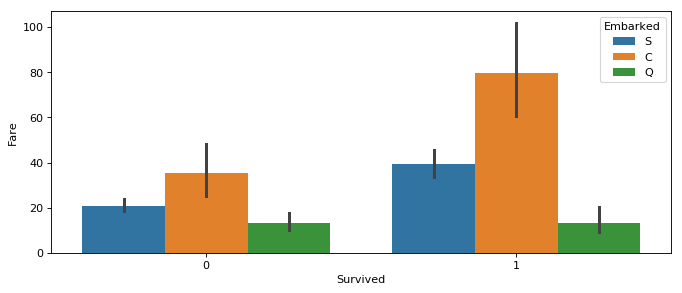

In [75]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(y='Fare', x='Survived', hue="Embarked", data=data)
plt.show()

#### >> In this plot we see that Fare is directly proportional to Embarked and Embarked is proprtional to Survived. Embarked C survied more in comprission to S and Q.
#### >> Fare and Survived is in the order of C>S>Q

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


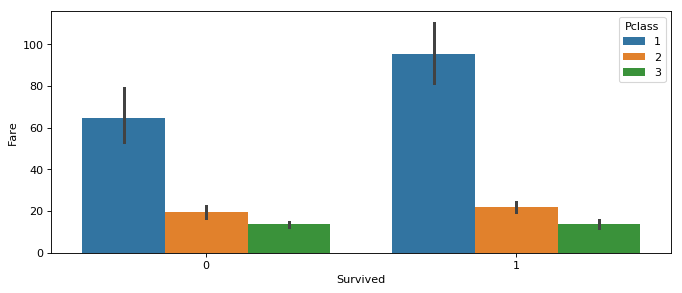

In [76]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.barplot(y='Fare', x='Survived', hue="Pclass", data=data)
plt.show()

# Age Feature

In [77]:
Ag=data.Age.sort_values().value_counts()
Ag.head(10)

24.0    30
22.0    27
18.0    26
28.0    25
30.0    25
19.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

In [78]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


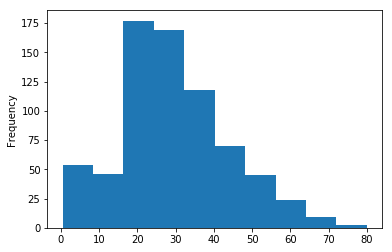

In [79]:
data['Age'].plot.hist()

### Age histogram based on Pclass,Survived

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


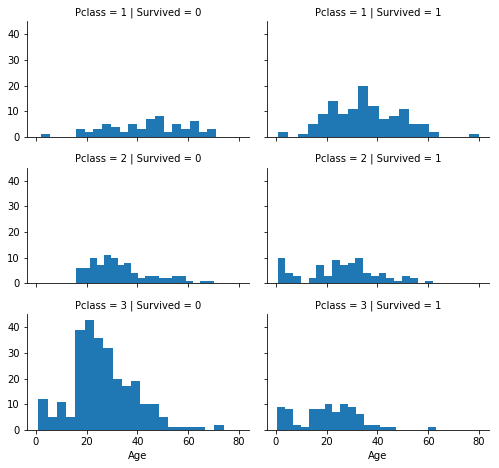

In [80]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)

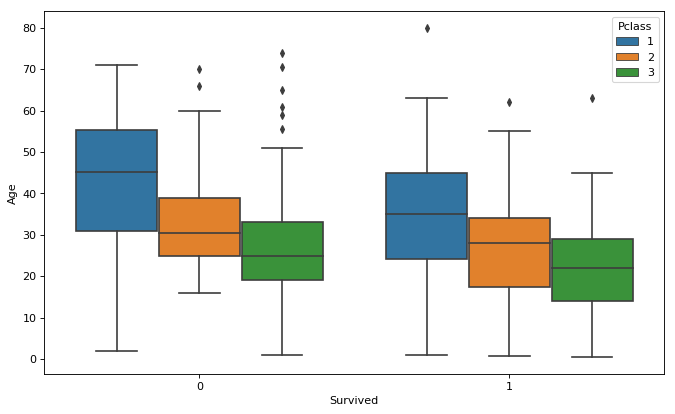

In [81]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Pclass", data=data)
plt.show()

##### >> we see that more no. of passangers survived in upper classes and also children were almost certain to survive if they belonged to higher classes.

### Age Histogram based on Gender and Survived

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


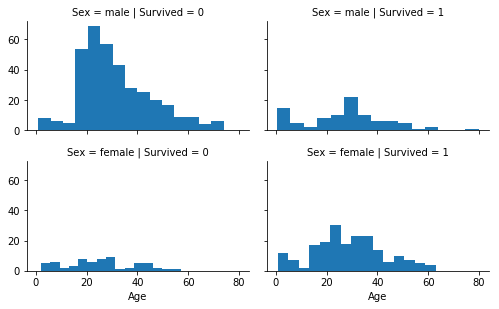

In [82]:
grid = sns.FacetGrid(data, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=15)

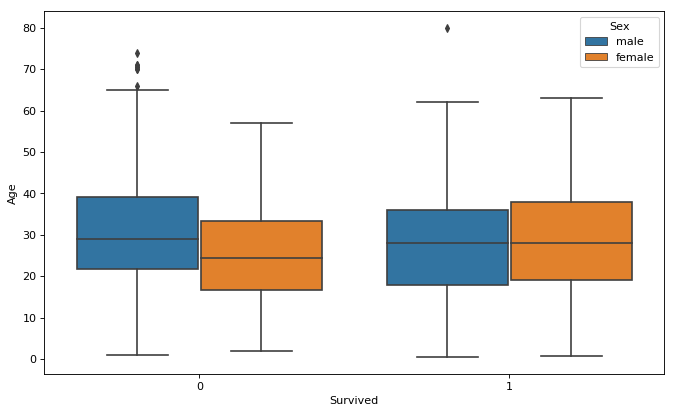

In [83]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Sex", data=data)
plt.show()

### Age histogram based on Embarked,Survived

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


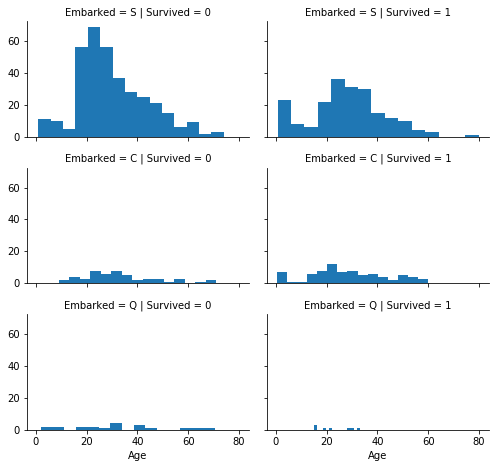

In [84]:
grid = sns.FacetGrid(data, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=15)

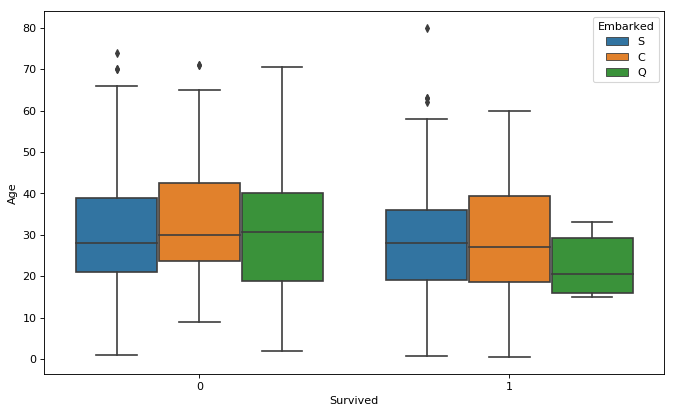

In [85]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Embarked", data=data)
plt.show()

#### >> we can clearly see that women had very higher survival rate.

### Age violinplot based on Pclass,Survived


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


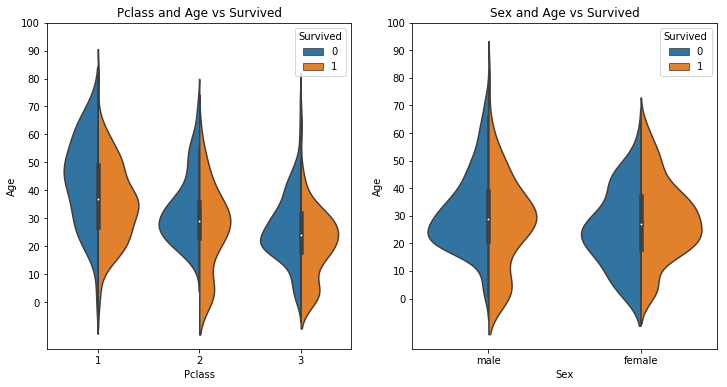

In [86]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

 **>>** You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.
 
 **>>** For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

**>>** For males, the survival chances decreases with an increase in age.Survival chances for Womens Passenegers aged 20-50 from Pclass1 is high,As we had seen earlier, the Age feature has 177 null values.

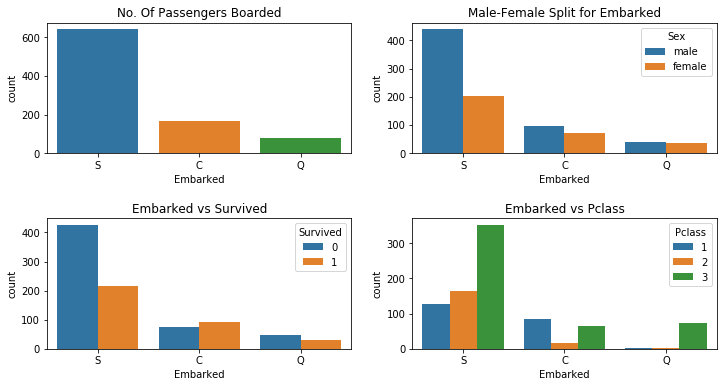

In [87]:
f,ax=plt.subplots(2,2,figsize=(12,6))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Maximum passenegers boarded from S. Majority of them being from Pclass3.The Passengers from C look to be lucky as a good proportion of them survived.Port Q had almost 95% of the passengers were from Pclass3, passengers from Pclass3 around 81% didn't survive.

Embarked seems to be correlated with survival, depending on the gender.
Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.
Pclass also seems to be correlated with survival. We will generate another plot of it below.

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. 

# Correlation
It is used to describe the linear relationship between two continuous variables (e.g., height and weight). In general, correlation tends to be used when there is no identified response variable. It measures the strength (qualitatively) and direction of the linear relationship between two or more variables.

In [88]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Let's see feature corelation

In [89]:
data.groupby('Pclass',as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


there seems to have little corelation among survived and Pclass.Higher class passangers are more likely to survive.

In [90]:
data.groupby('Sex',as_index=False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


that's pretting amazing correlation. females are 4 times more likely to survive

In [91]:
data.groupby('Embarked',as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [92]:
data.groupby('SibSp',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Having more sibling can be corelated to less survival rate

In [93]:
data.groupby('Parch',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Persons with more parents or children seem to have low chances.Let's divide our age data into bands and let's see if there is some corelation.

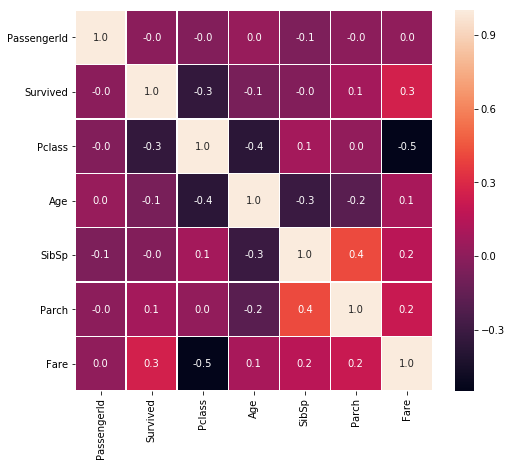

In [94]:
fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(data.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()

# Creating Dummy Variables

from the dataset 'sex', 'Embarked', 'sibsp' are categorical variables we'll turn them into dummy variables.

# Sex:

Convert ‘Sex’ feature into numeric.

In [95]:
gender=pd.get_dummies(data['Sex'],prefix='sx',drop_first=True)
gender.head()

,sx_male
0,1
1,0
2,0
3,0
4,1


# Embarked:

Convert ‘Embarked’ feature into numeric

In [96]:
embarked=pd.get_dummies(data['Embarked'],prefix='emb',drop_first=True)
embarked.head()

,emb_Q,emb_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


# Pclass
Convert 'Pclass' feature into numeric

In [97]:
pcl=pd.get_dummies(data['Pclass'],prefix='pcl',drop_first=True)
pcl.head()

,pcl_2,pcl_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [98]:
data=pd.concat([data,gender,embarked,pcl],axis=1)

# Data cleaning

In [99]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
Age,177,0.198653
Cabin,687,0.771044
Embarked,2,0.002245
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero.

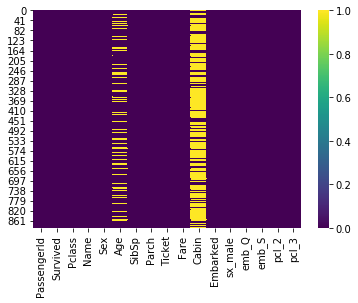

In [100]:
sns.heatmap(data.isnull(),cmap='viridis')

In [101]:
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sx_male,emb_Q,emb_S,pcl_2,pcl_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [102]:
data.dropna(inplace=True)

In [103]:
data.drop(['Pclass','Sex','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [104]:
data.drop(['Age','Fare','Embarked'],axis=1,inplace=True)

In [105]:
data.head()

,Survived,SibSp,Parch,sx_male,emb_Q,emb_S,pcl_2,pcl_3
0,0,1,0,1,0,1,0,1
1,1,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0
4,0,0,0,1,0,1,0,1


# Building Machine Learning Models &  Train Data
Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [106]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [107]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']


# What is Support Vector Machine?
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.
Support Vector Machine (SVM) is primarily a classier method that performs classification tasks by constructing hyperplanes in a multidimensional space that separates cases of different class labels. SVM supports both regression and classification tasks and can handle multiple continuous and categorical variables. For categorical variables a dummy variable is created with case values as either 0 or 1.

In [108]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy is  0.8271028037383178


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8177570093457944


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


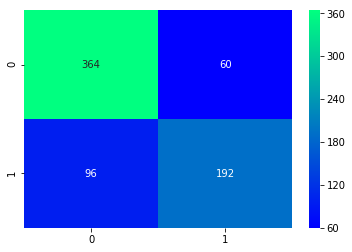

In [110]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Confusion matrix
The first row is about the not-survived-predictions: 364 passengers were correctly classified as not survived (called true negatives) and 60 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 96passengers where wrongly classified as survived (false negatives) and 192re correctly classified as survived (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

# How does SVM work?
The basics of Support Vector Machines and how it works are best understood with a simple example. Let’s imagine we have two tags: red and blue, and our data has two features: x and y. We want a classifier that, given a pair of (x,y) coordinates, outputs if it’s either red or blue. We plot our already labeled training data on a plane:

<img src="https://monkeylearn.com/blog/wp-content/uploads/2017/06/plot_original.png" style="width: 350px;"/>

A support vector machine takes these data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the decision boundary: anything that falls to one side of it we will classify as blue, and anything that falls to the other as red.

<img src="https://monkeylearn.com/blog/wp-content/uploads/2017/06/plot_hyperplanes_2.png" style="width: 350px;"/>

But, what exactly is the best hyperplane? For SVM, it’s the one that maximizes the margins from both tags. In other words: the hyperplane (remember it’s a line in this case) whose distance to the nearest element of each tag is the largest.

<img src="https://monkeylearn.com/blog/wp-content/uploads/2017/06/plot_hyperplanes_annotated.png" style="width: 350px;"/>

And that’s the basics of Support Vector Machines!
1.A support vector machine allows you to classify data that’s linearly separable.
2.If it isn’t linearly separable, you can use the kernel trick to make it work.
However, for text classification it’s better to just stick to a linear kernel.
Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

# Summary
We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training  machine learning models, and applied cross validation on it. 
Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. Another thing that can improve the overall result on the kaggle leaderboard would be a more extensive hyperparameter tuning on several machine learning models. You could also do some ensemble learning.Lastly, we looked at it’s confusion matrix and computed the models precision.

# I am a beginner in data science, Your feedback is very important to me,I hope this kernel is helpfull for you  -->> upvote will appreciate me for further work.
